In [22]:
from pytube import YouTube

import moviepy.editor as mp
from matplotlib import pyplot as plt
import math

import laugh_segmenter_light
import os
from PIL import Image

In [24]:
frame_seperator = "-"

def get_frame_path(path: str, count: int):
    path_split = path.split(".")
    return (path_split[0] + frame_seperator + str(count) + ".png")

In [2]:
def Download(link: str):
    youtubeObject = YouTube(link, use_oauth=True, allow_oauth_cache=True)
    youtubeObject = youtubeObject.streams.get_highest_resolution()
    filename = youtubeObject.title.encode('utf-8').hex() + ".mp4"
    try:
        youtubeObject.download(filename=filename)
        return filename
    except:
        print("An error has occurred")
    print("Download is completed successfully")


video_path = Download("https://www.youtube.com/watch?v=eh0HifeZ64s&ab_channel=TomSimons")
print(video_path)

596f75204c6175676820596f75204c6f736520497320566572792046756e6e7920496e205265616c204c6966652e2e2e.mp4


In [3]:
# Load the video
video = mp.VideoFileClip(video_path)

# Extract audio from the video
audio = video.audio

# Save the audio as a temporary file
audio_temp_file = 'temp_audio.wav'
audio.write_audiofile(audio_temp_file, codec='pcm_s16le')

MoviePy - Writing audio in temp_audio.wav


MoviePy - Done.


In [4]:
instances = laugh_segmenter_light.load_and_segment_laughter(audio_temp_file)

print("found %d laughs." % (len (instances)))
print(instances)

training with dropout=0.0
Loading checkpoint at: checkpoints/in_use/resnet_with_augmentation/best.pth.tar
Loading checkpoint at step:  60600
Set device cuda
Loaded file: temp_audio.wav
Segmenting laughter...


100%|██████████████████████████████████████████████████████████████████████████████| 4797/4797 [01:46<00:00, 45.01it/s]

found 8 laughs.
[(164.30770439677866, 165.56462691235114), (318.02467278271524, 320.65489952826505), (339.7182243477808, 341.8363715499492), (635.1415681930727, 636.8640175662645), (754.3862727722902, 756.0621694597202), (773.5427029633298, 775.1720469649979), (866.5549691156924, 868.7894980322658), (880.4742221585135, 881.1725124449426)]


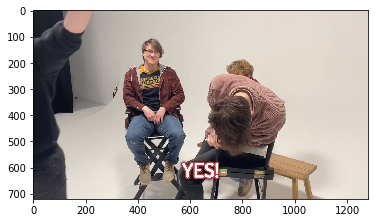

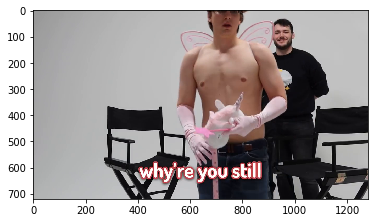

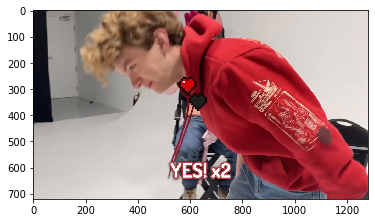

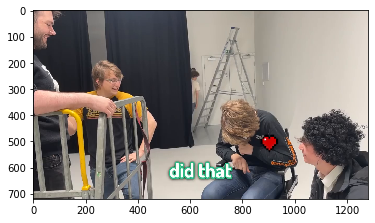

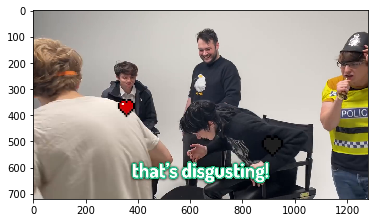

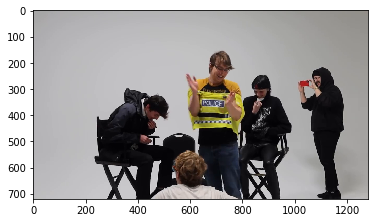

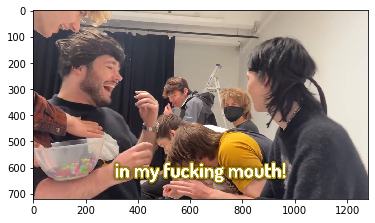

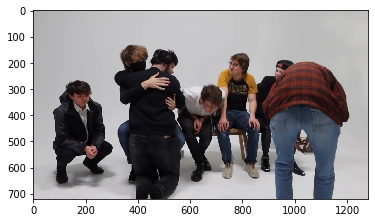

In [27]:
count = 0

output_dir = "Smiles"

for clip_start, clip_end in instances:
    clip = video.subclip(clip_start, clip_end) 

    # Get frame a second after done laughting
    frame = clip.get_frame(clip.duration / 2)

    plt.imshow(frame, interpolation ='nearest')
    plt.show()
    
    # Save frame
    frame_path = get_frame_path(os.path.join(output_dir, video_path), count)
    im = Image.fromarray(frame)
    im.save(frame_path)
    
    count = count + 1

In [11]:
# Remove the temporary audio file
os.remove(audio_temp_file)

[[4569.40553629 2244.76704657 2047.91543276 ... 1756.18168438
  1644.89787882 1800.44780758]]
[4569.40553629 2244.76704657 2047.91543276 ... 1756.18168438 1644.89787882
 1800.44780758]


NameError: name 'plt' is not defined